In [1]:
import pandas as pd
import numpy as np
import os

df1 = pd.read_csv('googleplaystore.csv') 
df1




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
# dane = df1.iloc[: , :9] 
# dane = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Content Rating']).mean().reset_index()
# dane


In [3]:
data = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
mydata = data[['App',"Type",'Category', 'Content Rating', "Rating", "Reviews", "Installs"]]
mydata


C:\Users\andrz\AppData\Local\Temp/ipykernel_14036/578550136.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,App,Type,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,COMICS,Everyone,4.4,190,10000
8192,💎 I'm rich,Paid,LIFESTYLE,Everyone,3.8,718,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,TOOLS,Everyone,4.0,19,10000


In [4]:
#sprawdzanie czy sa duble

mydata['App'].duplicated().sum()


0

Text(0.5, 0, 'Rating')

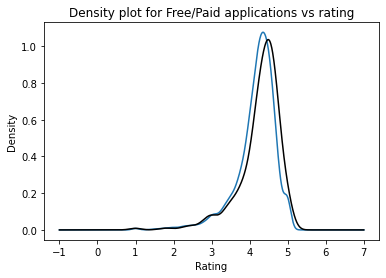

In [5]:
data_type = mydata[['App', 'Type', 'Rating', 'Installs', 'Reviews']]
# avg_rt =data_type.groupby(by='Type').mean()['Rating']
# avg_rt
free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt


free_type['Rating'].plot.density()
paid_type['Rating'].plot.density(color = 'k')
plt.title('Density plot for Free/Paid applications vs rating')
plt.xlabel('Rating')



<AxesSubplot:ylabel='Density'>

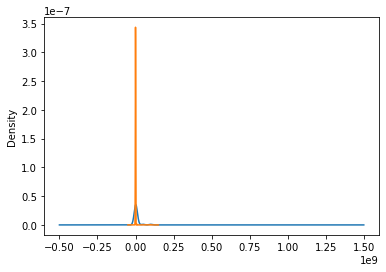

In [6]:
#bez usuwania outlines dla Installs

free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type['Installs'].plot.density()
paid_type['Installs'].plot.density()


<AxesSubplot:ylabel='Density'>

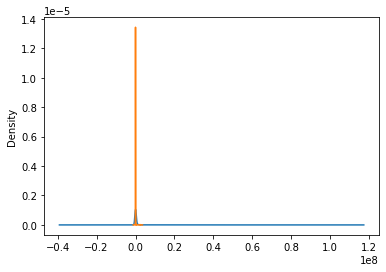

In [7]:
free_type["Reviews"].plot.density()
paid_type['Reviews'].plot.density()

<AxesSubplot:ylabel='Density'>

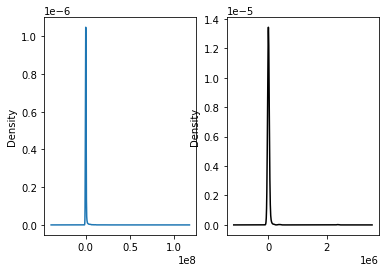

In [8]:
plt.subplot(1,2,1)
free_type['Reviews'].plot.density()
plt.subplot(1,2,2)
paid_type['Reviews'].plot.density(color = 'k')

<AxesSubplot:ylabel='Density'>

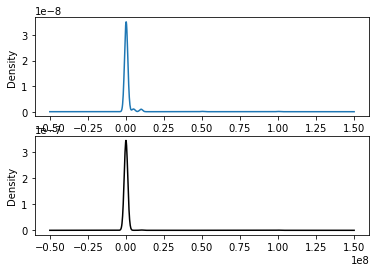

In [9]:
#przebieg dla 'Installs' bez usuwania outlines - na dwóch różnych wykresach

plt.subplot(2,1,1)
free_type['Installs'].plot.density()
plt.subplot(2,1,2)
paid_type['Installs'].plot.density(color = 'k')


In [10]:
roz_mean_i =round(free_type['Installs'].mean() - paid_type['Installs'].mean(), 2)
roz_mean_i


9635767.33

In [11]:
roz_std_i =round(free_type['Installs'].std() - paid_type['Installs'].std(), 2)
roz_std_i

56359531.85

In [12]:
roz_mean_r =round(free_type['Reviews'].mean() - paid_type['Reviews'].mean(), 2)
roz_mean_r

263766.95

In [13]:
roz_std_r =round(free_type['Reviews'].std() - paid_type['Reviews'].std(), 2)
roz_std_r

1961268.12

In [14]:
stos_mean_i = round(free_type['Installs'].mean()/paid_type['Installs'].mean(), 2)
stos_mean_i

37.96

In [15]:
stos_mean_r = round(free_type['Reviews'].mean()/paid_type['Reviews'].mean(), 2)
stos_mean_r

25.16

In [16]:
data_type['Installs'].max()

1000000000

In [17]:
max_data= data_type[data_type['Installs'] ==data_type['Installs'].max()] #zestawienie aplikacji o największej liczbie pobrań

max_data_r =max_data[max_data['Reviews']== max_data['Reviews'].max()] #aplikacja najbardziej popularna (rozważanie pod kątem free/paid) // Subway Surfers
max_data_r

max_data_rt =max_data[max_data['Rating']== max_data['Rating'].max()] #aplikacje najbardziej popularne najlepiej ocenianie // Subway Surfers
print(max_data_rt['App'])
print('----------')
print(max_data_r['App'])
max_data_rt

4007     Google Photos
4422         Instagram
6807    Subway Surfers
Name: App, dtype: object
----------
3432    Facebook
Name: App, dtype: object


,App,Type,Rating,Installs,Reviews
4007,Google Photos,Free,4.5,1000000000,10859051
4422,Instagram,Free,4.5,1000000000,66577446
6807,Subway Surfers,Free,4.5,1000000000,27725352


In [18]:


max_data_f= free_type[free_type['Installs'] ==free_type['Installs'].max()]
max_data_f

max_data_p = paid_type[paid_type['Installs']== paid_type['Installs'].max()]
sts_max = max_data_f['Installs'].unique()[0] / max_data_p['Installs'].unique()[0]
sts_max #aplikacja o największej liczny pobrań należąca do kategorii darmowe jest 100 razy bardziej popularna niż aplikacja najczęściej pobierana płatna

10.0

In [19]:
avg_free = data_type[data_type['Type']== 'Free']['Rating'].mean()
avg_paid = data_type[data_type['Type']== 'Paid']['Rating'].mean()


print(f'Średnia ocena aplikacji darmowej to : {avg_free}, natomiast płatnej to: {avg_paid}')

Średnia ocena aplikacji darmowej to : 4.166504214963111, natomiast płatnej to: 4.26241721854304


In [20]:
data_type.corr(method='pearson') #badanie korelacji

,Rating,Installs,Reviews
Rating,1.000000,0.040254,0.055035
Installs,0.040254,1.000000,0.623897
Reviews,0.055035,0.623897,1.000000


In [21]:
#statystyka - bez usuniecia outlines

s1 = data_type.groupby(by='Type').describe()['Rating']
s2 = data_type.groupby(by='Type').describe()['Reviews']
s3 = data_type.groupby(by='Type').describe()['Installs']

s1

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7592.0,4.166504,0.534214,1.0,4.0,4.3,4.5,5.0
Paid,604.0,4.262417,0.555863,1.0,4.1,4.4,4.6,5.0


<AxesSubplot:>

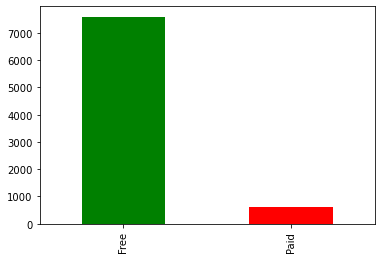

In [22]:

mydata['Type'].value_counts().plot(kind='bar', color=('green', 'red'))

In [23]:
top_10_free =free_type.sort_values(['Installs',"Reviews"], ascending=False).iloc[:10]

top_10_free



,App,Type,Rating,Installs,Reviews
3432,Facebook,Free,4.1,1000000000,78158306
7665,WhatsApp Messenger,Free,4.4,1000000000,69119316
4422,Instagram,Free,4.5,1000000000,66577446
5096,Messenger – Text and Video Chat for Free,Free,4.0,1000000000,56646578
6807,Subway Surfers,Free,4.5,1000000000,27725352
7834,YouTube,Free,4.3,1000000000,25655305
4007,Google Photos,Free,4.5,1000000000,10859051
6592,Skype - free IM & video calls,Free,4.1,1000000000,10484169
3991,Google Chrome: Fast & Secure,Free,4.3,1000000000,9643041
5000,Maps - Navigate & Explore,Free,4.3,1000000000,9235373


In [24]:
data[data["Type"] == "Paid"].sort_values(['Installs',"Reviews"], ascending=False).iloc[:10] #jako ciekawostka

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
1829,Calculator,TOOLS,4.3,57,Varies with device,100000000,Paid,Everyone
5135,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,Everyone 10+
4236,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,Mature 17+
4030,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,Mature 17+
1374,Bloons TD 5,FAMILY,4.6,190086,94M,1000000,Paid,Everyone
7675,Where's My Water?,FAMILY,4.7,188740,69M,1000000,Paid,Everyone
1919,Card Wars - Adventure Time,FAMILY,4.3,129603,23M,1000000,Paid,Everyone 10+
7288,True Skate,SPORTS,4.4,129409,73M,1000000,Paid,Everyone
3581,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000,Paid,Teen
1204,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,Everyone
